In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset from URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Step 3: Separate features (X) and target (y)
X = data.drop("medv", axis=1).values   # features
y = data["medv"].values                # target (house price)

# Step 3.1: Feature scaling (normalize X)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)



In [2]:
# Step 4: Implement Linear Regression with Gradient Descent
class LinearRegressionScratch:
    def __init__(self, lr=0.0001, epochs=1000):
        self.lr = lr          # learning rate
        self.epochs = epochs  # number of iterations
        self.w = None         # weights
        self.b = None         # bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [3]:
# Step 5: Train the model with scaled features
model = LinearRegressionScratch(lr=0.01, epochs=10000)  # smaller lr after scaling
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

print("Final Weights:", model.w)
print("Final Bias:", model.b)


Final Weights: [-0.92787566  1.08109247  0.13942259  0.6819511  -2.05646143  2.67449831
  0.01923921 -3.10415187  2.65849003 -2.07254369 -2.06046895  0.84924216
 -3.74348336]
Final Bias: 22.532806324110496


In [4]:
# Step 6: Mean Squared Error
mse = np.mean((y - y_pred) ** 2)

# Step 7: R² Score
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 21.894833380684418
R² Score: 0.7406426380614732


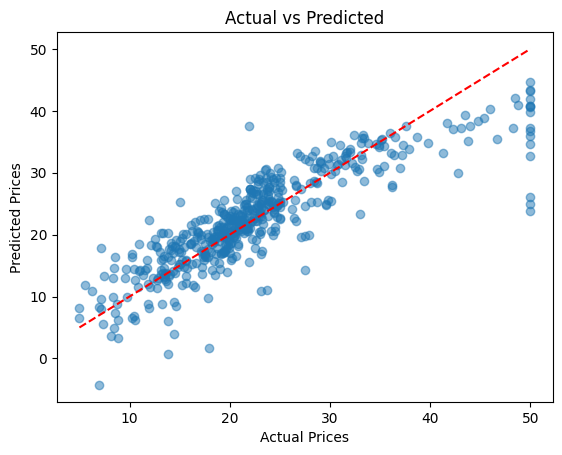

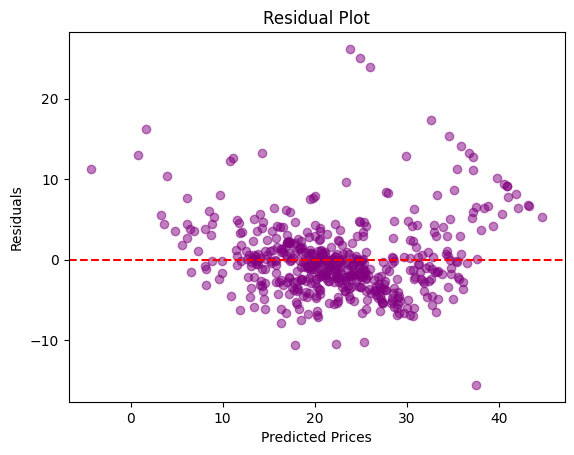

In [5]:
# Step 6: Actual vs Predicted
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.savefig("actual_vs_predicted.png")
plt.show()

# Step 7: Residual Plot
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig("residual_plot.png")
plt.show()


In [6]:
# Show equation for Scratch model
features = data.columns[:-1]  # feature names
equation = "Price = "
for i in range(len(model.w)):
    equation += f"({model.w[i]:.4f} * {features[i]}) + "
equation += f"{model.b:.4f}"  # bias

print("Final Regression Equation (Scratch):")
print(equation)


Final Regression Equation (Scratch):
Price = (-0.9279 * crim) + (1.0811 * zn) + (0.1394 * indus) + (0.6820 * chas) + (-2.0565 * nox) + (2.6745 * rm) + (0.0192 * age) + (-3.1042 * dis) + (2.6585 * rad) + (-2.0725 * tax) + (-2.0605 * ptratio) + (0.8492 * b) + (-3.7435 * lstat) + 22.5328
